In [31]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [5]:
#load dataset
df = pd.read_csv("Iris.csv")

#check top 10 data
df.head(10)

#check NaN and NULL values
df.isna().values.any()

#check features data types
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
#select features
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

#separating the features
X = df.loc[:, features].values

#separating out the target (species)
y = df.loc[:,["Species"]].values

#normalization the features
X = StandardScaler().fit_transform(X)

In [7]:
#PCA projection
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data=principalComponents, columns=["principal component 1", "principal component 2"])

In [8]:
finalDF = pd.concat([principalDF, df[["Species"]]], axis=1)

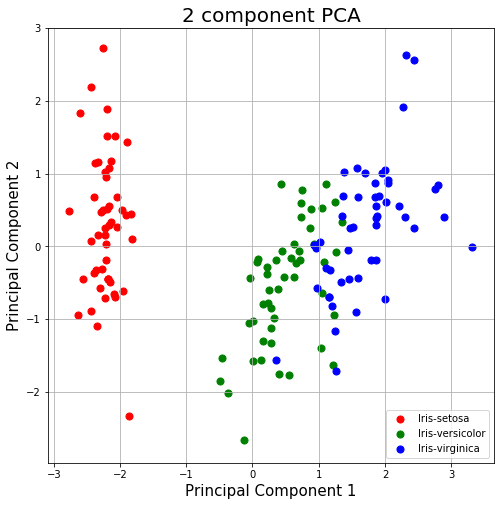

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
Species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for Species, color in zip(Species,colors):
    indicesToKeep = finalDF['Species'] == Species
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1']
               , finalDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Sec version